<a href="https://colab.research.google.com/github/apmsm3637/Python-Basic-Samples/blob/main/UpLevel_Regression_Algorithms_Live_Class_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression on Salary Data

---



**Dataset:** [Salary_Data.csv](https://drive.google.com/file/d/1yPpWIq-Zb-8FB268QkJskGDNTSlVI4cK/view?usp=sharing)

This dataset, titled Salary_Data.csv, contains information on the relationship between the number of years of experience and the corresponding salary of individuals. The dataset consists of 30 observations and two variables:

`YearsExperience`: This column represents the number of years of professional experience an individual has.

`Salary`: This column represents the annual salary of the individual in dollars.

In [4]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [5]:
df = pd.read_csv('Salary_Data.csv')

In [ ]:
X = df['YearsExperience'].values.reshape(-1,1) # input  # X is Independent Variable # rehape based on what Scikit learn expect and manage variable around
y = df['Salary'].values.reshape(-1,1) # output   # Y is dependent variable
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.shape
#df.shape (rows, columns)

#df.head(6)
#df.tail(6)

(30, 2)

`f(YOE)` --> Salary
Simple Linear Regression


#### **Supervised Learning WorkFlow**
Data Collection [Raw Data] --> Feature Engineering --> [Train-Test split: Types] EDA on the train set --> Train --> Learn the model parameters
Test Set --> Evaluate the model performance

In [ ]:
# Train [70%] - Test [30%]
# Small Sized Dataset --> Not the right way for this dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
# Randomly splits the train-test
X_train

array([[ 8.2],
       [ 5.9],
       [ 2.2],
       [ 2. ],
       [ 8.7],
       [ 5.1],
       [ 4.5],
       [ 6.8],
       [ 3.7],
       [ 4.9],
       [ 9. ],
       [ 1.1],
       [ 1.3],
       [ 7.9],
       [ 3.9],
       [ 6. ],
       [ 5.3],
       [ 3. ],
       [10.3],
       [ 1.5],
       [ 4.1]])

In [ ]:
df['YearsExperience'].isnull().sum()

0

In [ ]:
df['Salary'].isnull().sum()

0

### **Tips**

Univariate Dataset --> Don't need feature Scaling here

Multivariate (Multiple features) datasets --> Linear Regression --> Then you need feature scaling

Distance based algorithms [will discuss in the upcoming modules] --> you will need feature scaling for multivariate data

**Linear Regression Assumptions**

1 . Residuals follow normal distribution

Feature Scaling --> Standardization (Prefer for Linear Regression), Normalization

Outlier Detection [IQR, z-score]


Feature --> Sort the values in the ascending order

25%ile --> which is greater 1/4th of the values in your feature --> Q1

50%ile --> Median --> Q2

75%ile --> Q3

IQR  = Q3 - Q1

sample < Q1 - 1.5 * IQR ==> Low-end outlier

sample > Q3 + 1.5 * IQR ==> High-end outlier

Normalization --> Fix the range for every feature [K-Nearest Neighbors - will discuss in upcoming modules]

Standardization --> squish most of the data between -3 to 3

Resultant Mean = 0

Standard Deviation = 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
(np.abs(X_train_scaled) > 3).sum() # No outliers

0

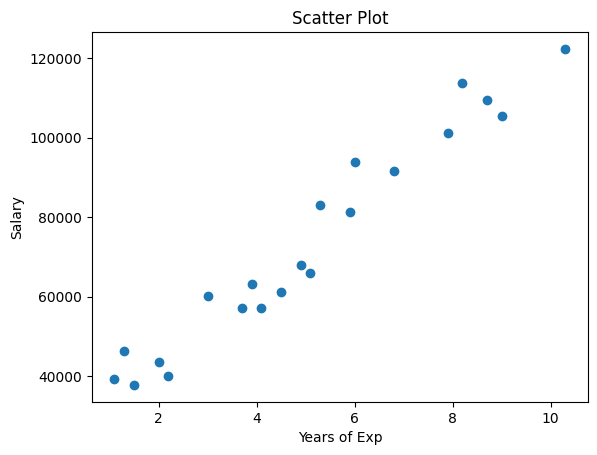

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X_train, y_train)
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.title('Scatter Plot')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
m = lr.coef_[0][0] # Slope (m)
m

9602.562213944955

In [ ]:
c = lr.intercept_[0] # c
c

25235.61631667627

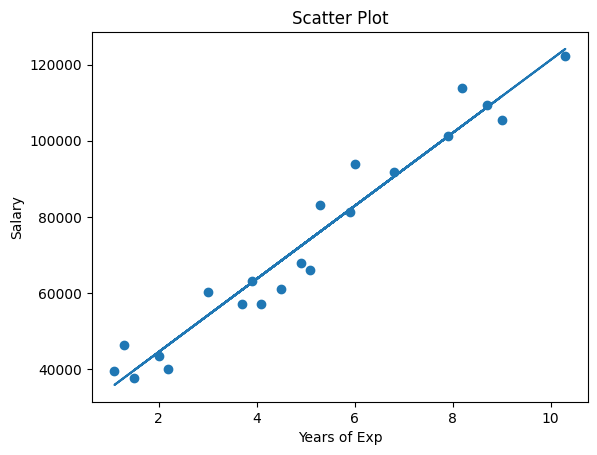

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, m*X_train + c)
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.title('Scatter Plot')
plt.show()

In [ ]:
# Years of Exp = 10
m*10 + c

121261.23845612582

In [ ]:
lr.predict([[10]])

array([[121261.23845613]])

In [ ]:
lr.predict(X_test) # Unseen Data Predictions

array([[ 55963.8154013 ],
       [126062.5195631 ],
       [ 53083.04673712],
       [116459.95734915],
       [ 55963.8154013 ],
       [117420.21357055],
       [ 63645.86517246],
       [ 93413.80803569],
       [ 63645.86517246]])

In [ ]:
results = pd.DataFrame(y_test, columns = ['Actual'])
results['preds'] = lr.predict(X_test)
results

,Actual,preds
0,54445.0,55963.815401
1,121872.0,126062.519563
2,56642.0,53083.046737
3,116969.0,116459.957349
4,64445.0,55963.815401
5,112635.0,117420.213571
6,56957.0,63645.865172
7,98273.0,93413.808036
8,55794.0,63645.865172


### Evaluation Metric

In [ ]:
# Evaluation Metrics
(results['Actual'] - results['preds']).abs().sum() # Sum of Absolute Errors [SAE]

42443.6513566029

In [ ]:
(results['Actual'] - results['preds']).abs().mean() # MAE

4715.961261844767

In [ ]:
# Negative Metric --> Lower the better [SAE]
((results['Actual'] - results['preds'])**2).sum() # SSE

257625738.8204684

In [ ]:
((results['Actual'] - results['preds'])**2).mean() # MSE

28625082.091163155

In [ ]:
import math
math.sqrt(((results['Actual'] - results['preds'])**2).mean()) #RMSE

5350.241311488964

In [ ]:
# Range of these metrics [SSE, MSE, MAE, MSE, RMSE] --> [0, inf)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, lr.predict(X_test)))
print(mean_squared_error(y_test, lr.predict(X_test)))

4715.961261844767
28625082.091163155


In [ ]:
from sklearn.metrics import r2_score
# Coefficient of determination
# 1 - [(sum_i (actual_i  - pred_i)^2) / sum_i(actual_i - mean_actual)^2]
# 1 - SSE/TSS --> (-ve inf, 1] # 1--> Ideal Model
# Constant model --> Predicts the mean regardless of the input --> r2_score = 0

r2_score(y_test, lr.predict(X_test))

# Multivariate data --> with large features --> don't use r2 score --> prefer adjusted_r2_score

0.963407053878536

In [ ]:
# MAPE [Mean Absolute Percentage Error]
# 1/N  * \sum_i |Actual_i - pred_i| / Actual_i

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, lr.predict(X_test))

0.06790727724958927

# Linear Regression on Bike Sharing Data

<center><img src="https://miro.medium.com/v2/resize:fit:996/1*ATlagc9XVjU6wu9z7CIVTQ.jpeg" width=500 height=300/></center>

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

https://www.kaggle.com/competitions/bike-sharing-demand/overview

Unlocking the patterns hidden within this rich dataset through regression analysis is like discovering the city's pulse—a chance to reveal how factors like weather, season, and daily routines influence bike demand.

**Dataset:** [Bike_Sharing_Data.csv](https://drive.google.com/file/d/1F0FQJf1IZBytvN1wF2CCO_4M3nEXFfPf/view?usp=sharing)

## Section 1: Data Information

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

####Data Fields
- **datetime** - hourly date + timestamp  
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter
- **holiday**- whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather** -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**- temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals




## Section 2: Run this code
*Note: These concepts are already covered in previous class.
The explanation for the same is available in the pre-class video.*

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
pd.set_option('display.max_colwidth', None)

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# # Load the data
# data = pd.read_csv("/content/drive/MyDrive/datasets/bike/full_data.csv", header=0)

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("full_data.csv")

# Data Pre-processing
data["datetime"] = pd.to_datetime(data["datetime"])
data["hour"] = data["datetime"].dt.hour
data["day_of_week"] = data["datetime"].dt.dayofweek
data["month"] = data["datetime"].dt.month
data["year"] = data["datetime"].dt.year
data["datetime"].dt.day.value_counts().sort_index()
data.drop(columns=["datetime"], inplace=True)

Saving full_data.csv to full_data (1).csv


## Section 3: Simple Linear Regression
Simple linear regression is a statistical method used to understand the relationship between two variables: one independent variable (predictor) and one dependent variable (outcome). It finds the best-fitting straight line (called the regression line) through the data points, which can then be used to predict the dependent variable based on the independent variable. In essence, it's about drawing a line that best explains how changes in one variable are associated with changes in another.

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtw-eyPcWmDPv8ApYYZO4ZkL_kiE_XMk4Syw&s"/></center>

In [ ]:
# View the data
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day_of_week,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,0,5,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,1,5,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2,5,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,3,5,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,4,5,1,2011


`count` is the target variable - the variable whose values will be predicted.

Let's find out which of the independent variables influence `count` the most.

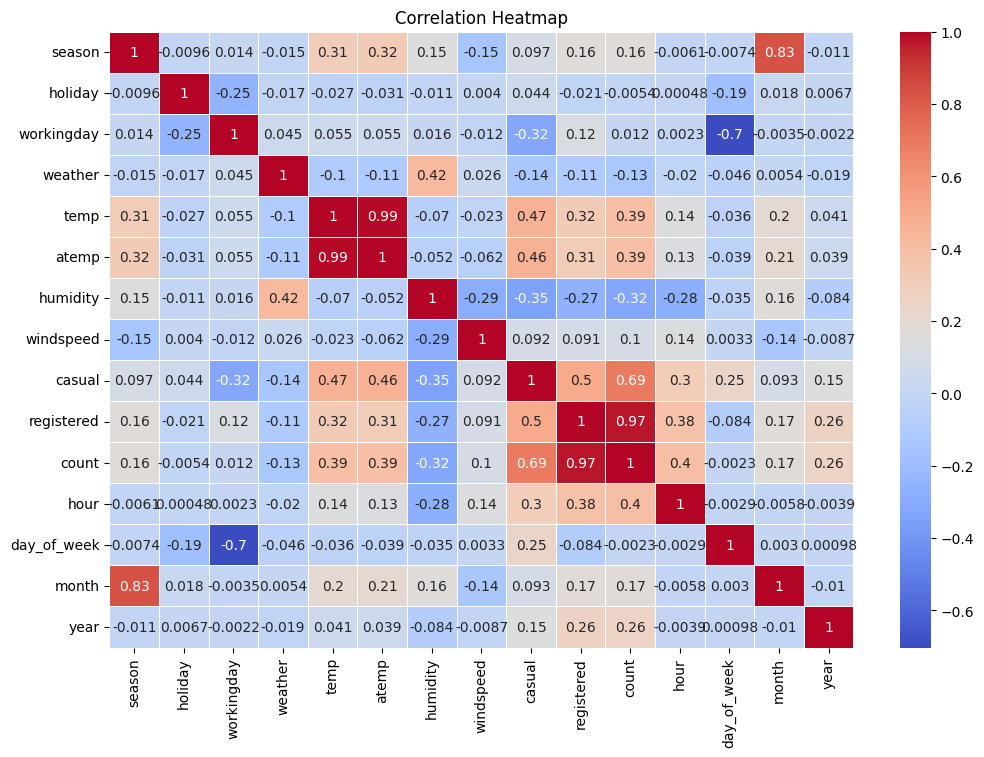

In [ ]:
# Find out the correlation of the variables with 'count'
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Observations:
- Casual + Registered = Count. So, these variables are highly correlated.
- `temp` has a good correlation with `count`.

Let's try to fit a simple linear regression model to understand how `temp` influences `count`.


In [ ]:
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17379 non-null  int64  
 1   holiday      17379 non-null  int64  
 2   workingday   17379 non-null  int64  
 3   weather      17379 non-null  int64  
 4   temp         17379 non-null  float64
 5   atemp        17379 non-null  float64
 6   humidity     17379 non-null  int64  
 7   windspeed    17379 non-null  float64
 8   casual       10886 non-null  float64
 9   registered   10886 non-null  float64
 10  count        10886 non-null  float64
 11  hour         17379 non-null  int32  
 12  day_of_week  17379 non-null  int32  
 13  month        17379 non-null  int32  
 14  year         17379 non-null  int32  
dtypes: float64(6), int32(4), int64(5)
memory usage: 1.7 MB


#### Observation:
There are missing values in the target variable `count`. So, those rows are not useful for the analysis. So, let's drop them.

In [ ]:
# Remove the rows with missing values
data= data.dropna()
data.isna().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0
registered,0


#### Observation:
There are no missing values and the data is ready for modelling.

Note: `x['data']` is a list or 1D array, but to fit a regression model, we need a 2D array (with rows as samples and columns as features). To reshape it into a 2D array, we use `reshape(-1, 1)`, where `-1` automatically adjusts the number of rows based on the data length, and `1` creates a single column, making it ready for the model.

In [ ]:
# Split the independent feature variable(X) and target variable(y)
X = data['temp'].values.reshape(-1, 1)
y = data['count']

In [ ]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the prepared data
print("Training features:\n", X_train[:5])
print("Training target:\n", y_train[:5])
print("Testing features:\n", X_test[:5])
print("Testing target:\n", y_test[:5])

Training features:
 [[27.88]
 [36.9 ]
 [32.8 ]
 [14.76]
 [13.12]]
Training target:
 2815     35.0
8695    450.0
8406    276.0
1543      5.0
4952    200.0
Name: count, dtype: float64
Testing features:
 [[33.62]
 [ 4.1 ]
 [ 9.84]
 [29.52]
 [25.42]]
Testing target:
 3133    127.0
5786     13.0
5224    163.0
8953    233.0
8054    222.0
Name: count, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)
y_pred

array([312.60423977,  45.01954576,  97.04990293, ..., 156.51316826,
       111.91571926, 245.70806627])

### Coefficients of the Model
Let's check the coefficients of the model in a linear regression equation \( Y = aX + b \) (where \( a \) is the slope and \( b \) is the intercept).

- `model.coef_` gives the value of \( a \), the slope (coefficient) of the feature(s).
- `model.intercept_` gives the value of \( b \), the intercept of the regression line.

In [ ]:
print("The best fit line is:",lr_model.coef_[0],"X+",lr_model.intercept_)

The best fit line is: 9.064522154841193 X+ 7.855004923758514


### Visualizing the Regression Fit

Let's visualize the regression line. The purpose of this plot is to visualize the relationship between temperature (X) and the number of bike rentals (Y), and to assess how well a linear regression model fits the data. The scatterplot displays actual data points, while the regression line helps in understanding the trend and making predictions.

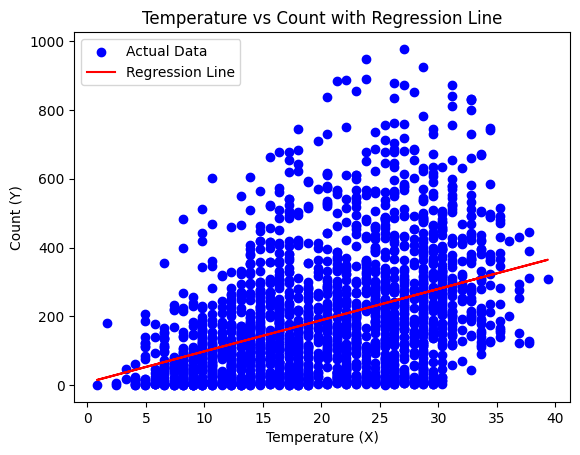

In [ ]:
# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature (X)')
plt.ylabel('Count (Y)')
plt.title('Temperature vs Count with Regression Line')
plt.legend()
plt.show()

#### Interpretation:
- The scatterplot shows a positive trend between temperature and bike rentals, suggesting that higher temperatures generally lead to more bike rentals. This is captured by the upward-sloping regression line.
- The data points are widely spread around the regression line, particularly at higher temperatures, indicating that the linear model captures the overall trend but may not be the best fit for all the data points. There is significant variability that the model does not account for.

To quantify the goodness of fit, let's calculate metrics such as R-squared (which measures the proportion of variance in the dependent variable explained by the model) or Mean Squared Error (MSE) (which measures the average of the squares of the errors).


### Evaluation of the Model
Evaluating a regression model is a crucial step to determine how well it predicts the target variable.

<center><img src="https://miro.medium.com/v2/resize:fit:1280/0*pYX4gfGQg7UYm8LQ" width=500 height=300/></center>

There are various errors and the goal is to minimize the error.
<center><img src="https://miro.medium.com/v2/resize:fit:1200/1*rVTCIffI2D_-i_CGeHwF6A.png" width=600 height=400/></center>


A higher R-squared value closer to 1 would indicate a better fit, while a lower MSE would suggest that the model's predictions are closer to the actual data points.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 125.15246124467015
Mean Squared Error (MSE): 27419.9933466138
R-squared (R2): 0.16926571255409573


#### Interpretation:

- **Mean Absolute Error (MAE): 125.15**
  - On average, the model’s predictions are off by about 125 bike rentals. This indicates that the model’s predictions are not very close to the actual number of bikes rented.

- **Mean Squared Error (MSE): 27,419.99**
  - This number is the average of the squared differences between the predicted and actual bike rentals. A higher MSE indicates that there are some predictions with large errors, making the model less reliable.

- **R-squared (R2): 0.17**
  - The R-squared value tells us how much of the variation in bike rentals can be explained by temperature alone. In this case, only 17% of the variability in bike rentals is explained by temperature, meaning that temperature alone is not a strong predictor of bike rentals.

#### Is it a poor model?
Yes! The high MAE and MSE, along with the low R-squared value, suggest that using only temperature to predict bike rentals is not very effective. The model is not capturing many other important factors that influence bike rentals, leading to poor prediction accuracy.

#### What next? How to improve the model?
To improve the model, we should consider using **Multiple Linear Regression**, which includes more variables (like season, humidity, windspeed, day of the week, etc.) to better predict the number of bikes rented. This approach would likely capture more of the factors that influence bike rentals, leading to more accurate predictions.

<hr> <hr>

## Section 4: Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression. Instead of using just one independent variable (predictor) to predict a dependent variable (outcome), multiple linear regression uses two or more independent variables to predict the outcome.

In simple terms, it’s like drawing a line in a multi-dimensional space (instead of a flat, 2D space) to best fit the data points. This allows the model to take into account multiple factors at once. For example, in predicting bike rentals, instead of just looking at temperature, you could also consider humidity, windspeed, and whether it’s a holiday, all at the same time, to make a more accurate prediction.

<center><img src="https://media.licdn.com/dms/image/D4D12AQFIJ_41MpAq2w/article-cover_image-shrink_720_1280/0/1692450132499?e=2147483647&v=beta&t=UWu2peXzF4N2Ki16pSOKDAe4lG1AjoMkylC0-_dePTU" width=500 height=300/></center>

In [ ]:
# Check the columns of the data to identify the features
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour',
       'day_of_week', 'month', 'year'],
      dtype='object')

*Note: As `casual` and `registered` are different forms of  `count`, we are not including them as features. Also, as `temp` and `atemp` are very highly correlating, using any one of them as the feature.*

In [ ]:
# Select features and target variable for regression
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'hour',
       'day_of_week', 'month', 'year']
# Split the data into features (X) and target (y)
X = data[features]
y = data['count']

# Check the feature data
X.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,hour,day_of_week,month,year
0,1,0,0,1,9.84,81,0.0,0,5,1,2011
1,1,0,0,1,9.02,80,0.0,1,5,1,2011
2,1,0,0,1,9.02,80,0.0,2,5,1,2011
3,1,0,0,1,9.84,75,0.0,3,5,1,2011
4,1,0,0,1,9.84,75,0.0,4,5,1,2011


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the prepared data
print("Training features:\n", X_train[:5])
print("Training target:\n", y_train[:5])
print("Testing features:\n", X_test[:5])
print("Testing target:\n", y_test[:5])

Training features:
       season  holiday  workingday  weather   temp  humidity  windspeed  hour  \
2815       3        0           1        1  27.88        83     6.0032     5   
8695       3        0           0        1  36.90        39    19.9995    16   
8406       3        0           1        1  32.80        41    16.9979    15   
1543       2        0           0        2  14.76        93     7.0015     4   
4952       4        0           0        1  13.12        45    16.9979    10   

      day_of_week  month  year  
2815            2      7  2011  
8695            5      8  2012  
8406            2      7  2012  
1543            6      4  2011  
4952            5     11  2011  
Training target:
 2815     35.0
8695    450.0
8406    276.0
1543      5.0
4952    200.0
Name: count, dtype: float64
Testing features:
       season  holiday  workingday  weather   temp  humidity  windspeed  hour  \
3133       3        0           1        1  33.62        59     0.0000    11   
5786  

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.44143863, -0.17333479,  0.68444534, ..., -0.50962778,
         0.13822447, -1.00322062],
       [ 0.44143863, -0.17333479, -1.46103704, ...,  0.99065576,
         0.42938526,  0.99678972],
       [ 0.44143863, -0.17333479,  0.68444534, ..., -0.50962778,
         0.13822447,  0.99678972],
       ...,
       [ 1.33811405, -0.17333479, -1.46103704, ...,  1.49075027,
         1.59402841, -1.00322062],
       [-1.35191223, -0.17333479, -1.46103704, ...,  0.99065576,
        -1.31757946, -1.00322062],
       [-0.4552368 , -0.17333479,  0.68444534, ..., -0.50962778,
        -0.4440971 ,  0.99678972]])

#### Implementation of Linear Regression Model

The following tasks need to be performed for the model implementation:
- Imports necessary libraries.
- Initializes and fits a linear regression model.
- Makes predictions on the test data.
- Evaluates the model using various metrics.


In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

y_pred

array([237.31249363,  44.3246386 , 207.2342294 , ..., 306.85911637,
        41.46345065, 240.61420634])

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 105.37654921325743
Mean Squared Error (MSE): 19972.65682681886
R-squared (R2): 0.39489515450674073


#### Interpretation:
The model performs poor.

Let's try to improve the model.

In [ ]:
# One-Hot Encoding for categorical features
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["hour", "day_of_week", "month", "year", "season", "holiday", "workingday", "weather"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoder.fit(data[categorical_features])
encoded = encoder.transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))
# Reset index before concatenating
data = data.drop(categorical_features, axis=1).reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
data = pd.concat([data, encoded_df], axis=1)

# View te merged data
data.head()

,temp,atemp,humidity,windspeed,casual,registered,count,hour_1,hour_2,hour_3,...,month_12,year_2012,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,3.0,13.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.02,13.635,80,0.0,8.0,32.0,40.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.02,13.635,80,0.0,5.0,27.0,32.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.84,14.395,75,0.0,3.0,10.0,13.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.84,14.395,75,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check the columns
data.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2012', 'season_2', 'season_3', 'season_4', 'holiday_1',
       'workingday_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [ ]:
features = ['temp', 'humidity', 'windspeed',  'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2012', 'season_2', 'season_3', 'season_4', 'holiday_1',
       'workingday_1', 'weather_2', 'weather_3', 'weather_4']
# Split the data into features (X) and target (y)
X = data[features]
y = data['count']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 74.12082170426517
Mean Squared Error (MSE): 10037.251798504338
R-squared (R2): 0.695904768635717


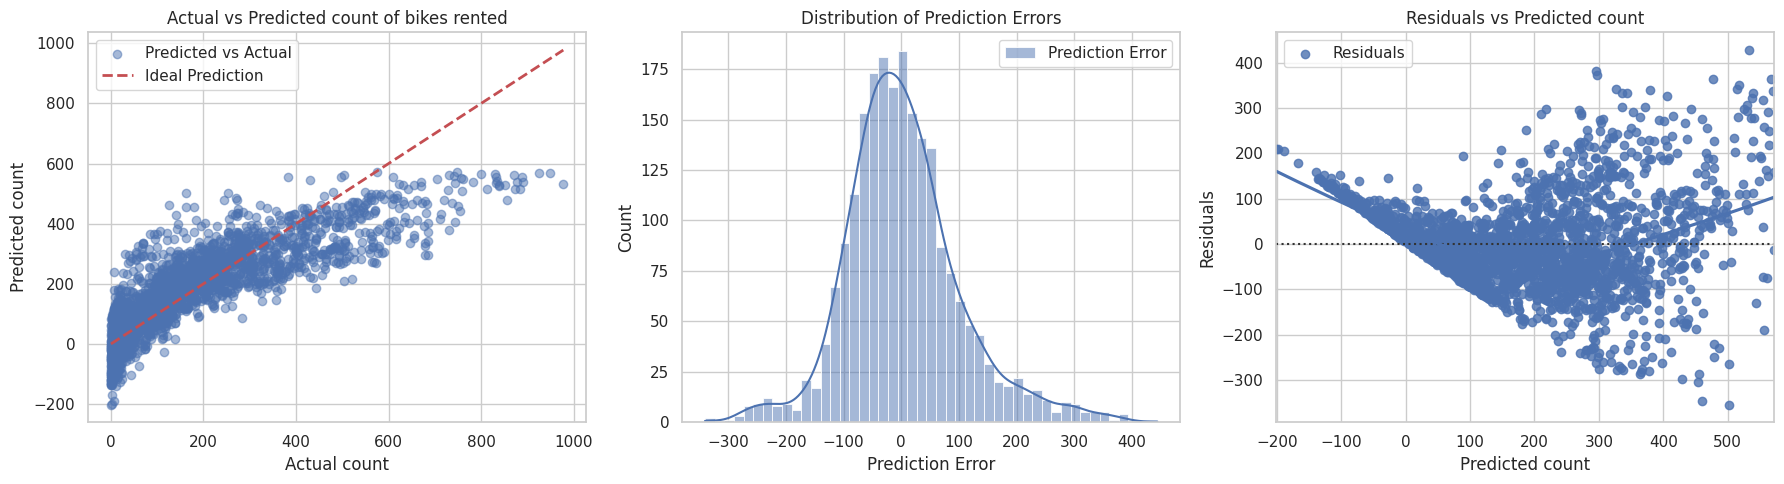

In [ ]:
#Visualization of Regression Predictions

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot of actual vs predicted fares
axes[0].scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Prediction')
axes[0].set_xlabel('Actual count')
axes[0].set_ylabel('Predicted count')
axes[0].set_title('Actual vs Predicted count of bikes rented')
axes[0].legend()

# Distribution plot of prediction errors
errors = y_test - y_pred
sns.histplot(errors, kde=True, ax=axes[1], label='Prediction Error')
axes[1].set_xlabel('Prediction Error')
axes[1].set_title('Distribution of Prediction Errors')
axes[1].legend()

# Residual plot
sns.residplot(x=y_pred, y=errors, lowess=True, ax=axes[2], label='Residuals')
axes[2].set_xlabel('Predicted count')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals vs Predicted count')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


#### Interpretation:
#### Graph 1: Actual vs Predicted Count of Bikes Rented
- The predicted values generally follow the trend of the actual values, indicating that the model captures the overall relationship.
- There is significant scatter around the red dashed line (ideal prediction), especially at higher counts, suggesting that the model's accuracy decreases as the count increases.
- The clustering of points at lower actual and predicted counts shows that the model is more consistent with lower bike rentals.

#### Graph 2: Distribution of Prediction Errors
- The error distribution is right-skewed, with a long tail on the positive side, indicating that the model tends to underpredict bike counts more frequently.
- Most errors are centered around zero, showing that the model's predictions are generally close to the actual values for many instances.
- The presence of a long tail suggests that there are instances where the model's predictions are significantly lower than the actual counts.

#### Graph 3: Residuals vs Predicted Count
- The residuals (errors) are not evenly distributed around the horizontal axis, indicating potential non-linearity or other patterns not captured by the model.
- There is a noticeable funnel shape in the residuals, where errors increase with higher predicted counts, suggesting heteroscedasticity (unequal variance).
- The upward trend in residuals at higher predicted counts suggests that the model might be systematically underestimating higher bike rental counts.

<hr><hr>

## Section 5: Learn this another method too!

`sm.OLS` (Ordinary Least Squares) is a function in the `statsmodels` library used for performing linear regression analysis. It is a more comprehensive and statistically detailed alternative to the `LinearRegression` class in scikit-learn.

### Key Features of `sm.OLS`:
- `sm.OLS` provides detailed regression outputs, including coefficients, p-values, confidence intervals, R-squared values, and more.

### Usage:
`sm.OLS` is typically used in situations where you need more than just fitting a linear model—such as when you require in-depth statistical analysis and interpretation of your regression results.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Add the intercept term
X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)


# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     357.4
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:33:44   Log-Likelihood:                -45873.
No. Observations:                7620   AIC:                         9.184e+04
Df Residuals:                    7571   BIC:                         9.218e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -62.5609      7.813     -8.007      0.000     -77.877     -47.245
temp              4.8750      0.354     13.776      0.000       4.181       5.569
humidity         -0.7761      0.083     -9.368      0.000      -0.938      -0.614
windspeed        -0.6833      0.153     -4.480      0.000      -0.982      -0.384
hour_1          -16.4429      7.926     -2.075      0.038     -31.980      -0.906
hour_2          -27.4501      7.890     -3.479      0.001     -42.916     -11.984
hour_3          -40.8028      8.054     -5.066      0.000     -56.591     -25.014
hour_4          -37.9582      7.856     -4.832      0.000     -53.358     -22.558
hour_5          -21.3135      7.907     -2.696      0.007     -36.813      -5.814
hour_6           36.4258      7.969      4.571      0.000      20.804      52.048
hour_7          168.1010      7.940     21.172      0.000     152.537     183.666
hour_8          319.3685      7.923     40.309      0.000     303.837     334.900
hour_9          169.7493      7.996     21.228      0.000     154.074     185.425
hour_10         111.3583      7.948     14.011      0.000      95.778     126.939
hour_11         134.1790      7.921     16.940      0.000     118.652     149.706
hour_12         184.7767      8.171     22.614      0.000     168.760     200.794
hour_13         177.0164      8.112     21.822      0.000     161.115     192.918
hour_14         154.2416      8.270     18.650      0.000     138.030     170.453
hour_15         165.7542      8.193     20.230      0.000     149.693     181.816
hour_16         232.1410      8.236     28.187      0.000     215.996     248.285
hour_17         387.2098      8.146     47.536      0.000     371.242     403.178
hour_18         355.7591      8.120     43.813      0.000     339.842     371.676
hour_19         245.4243      8.042     30.518      0.000     229.660     261.189
hour_20         163.8441      7.879     20.796      0.000     148.400     179.288
hour_21         112.8224      8.061     13.996      0.000      97.021     128.624
hour_22          75.1191      7.915      9.491      0.000      59.604      90.634
hour_23          36.0123      7.930      4.542      0.000      20.468      51.556
day_of_week_1     3.0178      4.438      0.680      0.497      -5.682      11.718
day_of_week_2     7.2068      4.419      1.631      0.103      -1.455      15.869
day_of_week_3     6.3179      4.436      1.424      0.154      -2.377      15.013
day_of_week_4    10.2539      4.389      2.337      0.019       1.651      18.857
day_of_week_5    -0.3862      3.483     -0.111      0.912      -7.213       6.441
day_of_week_6   -20.2353      3.574     -5.662      0.000     -27.241     -13.230
month_2           8.7902      5.774      1.522      0.128      -2.528      20.108
month_3          34.8328      6.105      5.706   

#### Interpretation:
- R-squared value indicates that percentage of the variance in bike rentals is explained by the model.
- High F-statistic  and p-value (0.00) confirm the model is statistically significant.
- Adjusted R-squared suggests some predictors may not contribute much and could be reconsidered. So, let's find out the multicollinearity of the variables using the variance inflation factor(VIF)

In [ ]:
# Import the necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature       VIF
0           const  0.000000
1            temp  5.777621
2        humidity  1.964759
3       windspeed  1.192358
4          hour_1  1.915457
5          hour_2  1.905620
6          hour_3  1.880381
7          hour_4  1.901915
8          hour_5  1.923247
9          hour_6  1.930734
10         hour_7  1.924929
11         hour_8  1.919185
12         hour_9  1.922597
13        hour_10  1.937914
14        hour_11  1.965790
15        hour_12  2.001821
16        hour_13  2.036392
17        hour_14  2.063171
18        hour_15  2.070861
19        hour_16  2.061189
20        hour_17  2.037402
21        hour_18  2.010951
22        hour_19  1.967867
23        hour_20  1.945945
24        hour_21  1.930259
25        hour_22  1.923392
26        hour_23  1.920282
27  day_of_week_1  1.835520
28  day_of_week_2  1.822100
29  day_of_week_3  1.847481
30  day_of_week_4  1.792292
31  day_of_week_5       inf
32  day_of_week_6       inf
33        month_2  1.907857
34        month_3  2

#### Interpretation:
- **VIF = 1:** No multicollinearity; the predictor is not correlated with other variables.
- **1 < VIF ≤ 5:** Low to moderate multicollinearity; generally acceptable but worth monitoring.
- **VIF > 5:** Indicates moderate multicollinearity; may start affecting the reliability of the model's coefficients.
- **VIF > 10:** High multicollinearity; problematic and often signals that the variable should be removed or combined with others.

There are various varaibles with `inf` VIF. These variables are not contributing significantly to the prediction. So, let's remove them and re-build the model.

In [ ]:
features = ['temp', 'humidity', 'windspeed',  'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
        'month_2', 'month_3',
       'year_2012', 'weather_2', 'weather_3', 'weather_4']
# Split the data into features (X) and target (y)
X = data[features]
y = data['count']
# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              1154.
Date:                Mon, 09 Sep 2024   Prob (F-statistic):                        0.00
Time:                        15:33:59   Log-Likelihood:                         -46098.
No. Observations:                7620   AIC:                                  9.227e+04
Df Residuals:                    7584   BIC:                                  9.252e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
temp              5.1233      0.160     31.957      0.000       4.809       5.438
humidity         -0.7067      0.064    -11.056      0.000      -0.832      -0.581
windspeed        -1.0170      0.146     -6.946      0.000      -1.304      -0.730
hour_1          -33.0021      7.334     -4.500      0.000     -47.378     -18.626
hour_2          -44.2137      7.266     -6.085      0.000     -58.456     -29.971
hour_3          -57.3192      7.514     -7.629      0.000     -72.048     -42.590
hour_4          -54.0369      7.296     -7.407      0.000     -68.338     -39.736
hour_5          -38.5312      7.350     -5.242      0.000     -52.939     -24.123
hour_6           19.1194      7.421      2.576      0.010       4.572      33.667
hour_7          152.6891      7.350     20.775      0.000     138.282     167.096
hour_8          303.0123      7.347     41.244      0.000     288.610     317.414
hour_9          156.2259      7.380     21.170      0.000     141.760     170.692
hour_10          95.3006      7.240     13.162      0.000      81.108     109.494
hour_11         120.2543      7.122     16.884      0.000     106.293     134.216
hour_12         170.5984      7.307     23.348      0.000     156.275     184.922
hour_13         163.5166      7.204     22.700      0.000     149.396     177.637
hour_14         138.8938      7.294     19.041      0.000     124.595     153.193
hour_15         149.5297      7.253     20.617      0.000     135.313     163.747
hour_16         218.0354      7.298     29.878      0.000     203.730     232.341
hour_17         373.2180      7.247     51.499      0.000     359.012     387.424
hour_18         339.9017      7.237     46.970      0.000     325.716     354.087
hour_19         228.5805      7.256     31.501      0.000     214.356     242.805
hour_20         147.5176      7.142     20.654      0.000     133.516     161.519
hour_21          96.6584      7.381     13.096      0.000      82.190     111.127
hour_22          60.1186      7.266      8.274      0.000      45.875      74.362
hour_23          19.3078      7.256      2.661      0.008       5.084      33.531
day_of_week_1    -1.1652      3.603     -0.323      0.746      -8.228       5.897
day_of_week_2     2.3923      3.603      0.664      0.507      -4.670       9.455
day_of_week_3     2.9870      3.575      0.835      0.403      -4.022       9.996
day_of_week_4     6.9547      3.585      1.940      0.052      -0.073      13.983
month_2         -51.7359      4.480    -11.548      0.000     -60.518     -42.954
month_3         -26.2195      4.365     -6.006      0.000     -34.777     -17.662
year_2012        86.1026      2.348     36.671      0.000      81.500      90.705
weather_2       -12.0896      2.

#### Interpretation:
- **R-squared (0.846) and Adjusted R-squared (0.845):** The model now explains about 84.6% of the variance in bike rentals, indicating a strong fit.
- **High F-statistic (1154) and p-value (0.00):** The model is statistically significant, meaning the predictors reliably explain the variability in the count of bike rentals.
- **Log-Likelihood (-46098):** A less negative value compared to the previous model, suggesting a slightly better fit.
- **AIC (9.227e+04) and BIC (9.252e+04):** These values are slightly improved, indicating a better model balance between complexity and fit after removing variables with high VIF.


In [ ]:
# Make predictions on the test data
y_pred = model1.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 77.0230286557108
Mean Squared Error (MSE): 10946.157386552626
R-squared (R2): 0.6754658193668837


#### Interpretation:
Results are similar using both the libraries.
<hr>
<hr>